<a href="https://colab.research.google.com/github/esthel7/ai/blob/master/mnist_numCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#사용할 라이브러리

from tensorflow.keras.models import Sequential #sequential은 순차적인 인공 신경망 레이어
#tensorflow(딥러닝 생성 도와주는 라이브러리) 쉽게 사용하도록 하는 keras

from tensorflow.keras.layers import Dense, Activation 
#Dense는 모든 인공신경망 레이어 연결되어있는것, Activation은 활성화함수(레이어 사이에 위치, 값 가중)

from tensorflow.keras.utils import to_categorical #0~9까지 구분해주는 to_categorical 함수
from tensorflow.keras.datasets import mnist

import numpy as np #numpy 라이브러리를 np 이름으로 호출
import matplotlib.pyplot as plt #matplot은 그래프 라이브러리, pyplot은 그림그리기 => 결과를 그래프로 확인

In [2]:
#mnist 데이터셋에서 데이터 가져오기

(x_train, y_train), (x_test, y_test)=mnist.load_data() #mnist 데이터셋에서 데이터 가져오기
#mnist에는 데이터가 4종류로 구분, 학습 데이터 x,y & 테스트 데이터 x,y
#y_train은 x_train의 정답

print("x_train shape", x_train.shape) #x_train은 28pixel*28pixel 사이즈의 데이터가 60000개
print("y_train shape", x_train.shape) #y_train은 60000개
print("x_test shape", x_test.shape) #x_test는 28pixel*28pixel 사이즈의 데이터가 10000개
print("y_test shape", y_test.shape) #y_test는 10000개

11490434/11490434 [==============================] - 1s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000, 28, 28)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [3]:
#mnist 데이터셋에서 가져온 데이터 변경

X_train=x_train.reshape(60000, 784) #28pixel*28pixel을 1*784pixel로 변환
X_test=x_test.reshape(10000, 784)

X_train=X_train.astype('float32') #데이터 정규화. 0~255에서 0~1로 변경(편차 줄이기위함)위해 실수형으로 바꿈
X_test=X_test.astype('float32')
X_train/=255 # 0~255를 0~1사이 값으로 변경
X_test/=255

Y_train=to_categorical(y_train, 10) #60000개 데이터를 10개로 분류 => 분류 더 잘함
Y_test=to_categorical(y_test, 10)


In [4]:
#모델 설계

model=Sequential() #딥러닝 모델 쉽게 개발하도록
model.add(Dense(512, input_shape=(784,))) #add는 층 추가. 784개 데이터로 다음 층으로 이동(노드 512개)
model.add(Activation('relu')) #활성화함수 relu 사용
model.add(Dense(256)) #다음층으로 이동(노드 256개)
model.add(Activation('relu'))
model.add(Dense(10)) #이미지를 10개로 분류하기 위해 노드 10개
model.add(Activation('softmax')) #활성화함수 softmax 사용 => 가장 높은 확률의 값으로 분류
model.summary() #모델이 어떻게 구성되었는지 살펴보기

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [5]:
#딥러닝으로 모델 학습

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#compile은 keras가 제공하는 심층 신경망의 학습하는 방법
#categorical_crossentropy는 다중분류 오차값 계산, optimizer는 오차 줄이기, accuracy는 정답 비율 알려줌

model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1) #fit은 모델 학습
#학습할 데이터, 정답 데이터, 한번에 학습할 데이터, 반복 학습, fit함수 결과값 순으로 입력
#verbose 0은 아무런 표시 하지 않음, 1은 진행 사항 알려줌, 2는 학습 결과 알려줌 

Epoch 1/10
469/469 [==============================] - 18s 33ms/step - loss: 0.2263 - accuracy: 0.9336
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0815 - accuracy: 0.9750
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0547 - accuracy: 0.9830
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0372 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0256 - accuracy: 0.9919
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0164 - accuracy: 0.9946
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 10/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0123 - accur

In [6]:
#테스트용 데이터 넣어보기

score=model.evaluate(X_test, Y_test)
print('Test score:',score[0]) #오차값 0~1 사이로 출력됨, 0에 가까울수록 좋음
print('Test accuracy:',score[1]) #정확도 0~1사이로 출력됨, 1에 가까울수록 좋음

313/313 [==============================] - 2s 5ms/step - loss: 0.0776 - accuracy: 0.9821
Test score: 0.0776187852025032
Test accuracy: 0.9821000099182129


In [7]:
#모델 학습 결과 확인하기

predicted_classes=np.argmax(model.predict(X_test),axis=1) #predict함수는 결과 예측 함수
#axis가 1이면 가로 중에서 가장 큰 수, 0이면 세로 중에서 가장 큰 수

correct_indices=np.nonzero(predicted_classes==y_test)[0] #예측값 맞으면 1. nonzero함수가 1 위치 찾아 넣음
incorrect_indices=np.nonzero(predicted_classes!=y_test)[0] #예측값 틀리면 1

313/313 [==============================] - 1s 4ms/step


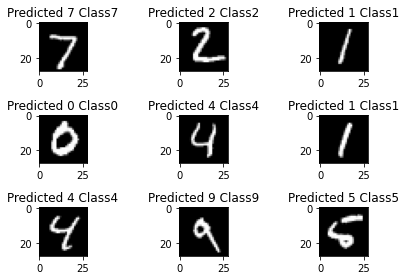

In [11]:
#화면에 그래프 출력 - 잘 예측한 데이터

plt.figure() #그래프 그리기 명령어
for i in range(9):
  plt.subplot(3,3,i+1) #subplot은 그림의 위치 정해줌
  correct=correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray') #imshow는 이미지 보여주는 함수
  #X_test의 첫번째 그림은 28picel*28picel 형식이 아니므로 그 형식으로 만들어주기, 그림을 회색조로 표현

  plt.title("Predicted {} Class{}".format(predicted_classes[correct], y_test[correct]))
  #{}에 들어갈 수를 format함수를 통해 전달 (예측한 값, 정답)

plt.tight_layout() #화면에 그림 보여줌

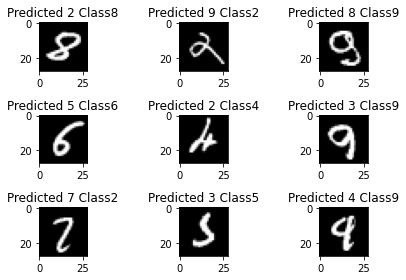

In [10]:
#화면에 그래프 출력 - 잘 예측하지 못한 데이터

plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect=incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {} Class{}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()